Material Original de:

Domingo Mery

Department of Computer Science - Universidad Católica de Chile

# Image Processing with Geometric Transformation

# Libraries

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image

In [22]:
!curl -L -o louvre.png https://www.dropbox.com/s/xro9nm69qxt3pl9/louvre.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   118  100   118    0     0    329      0 --:--:-- --:--:-- --:--:--   337

100    17  100    17    0     0     16      0  0:00:01  0:00:01 --:--:--    16
100    17  100    17    0     0     16      0  0:00:01  0:00:01 --:--:--     0

 26  771k   26  208k    0     0   116k      0  0:00:06  0:00:01  0:00:05  116k
100  771k  100  771k    0     0   394k      0  0:00:01  0:00:01 --:--:-- 3357k


size =  (1024, 1024)


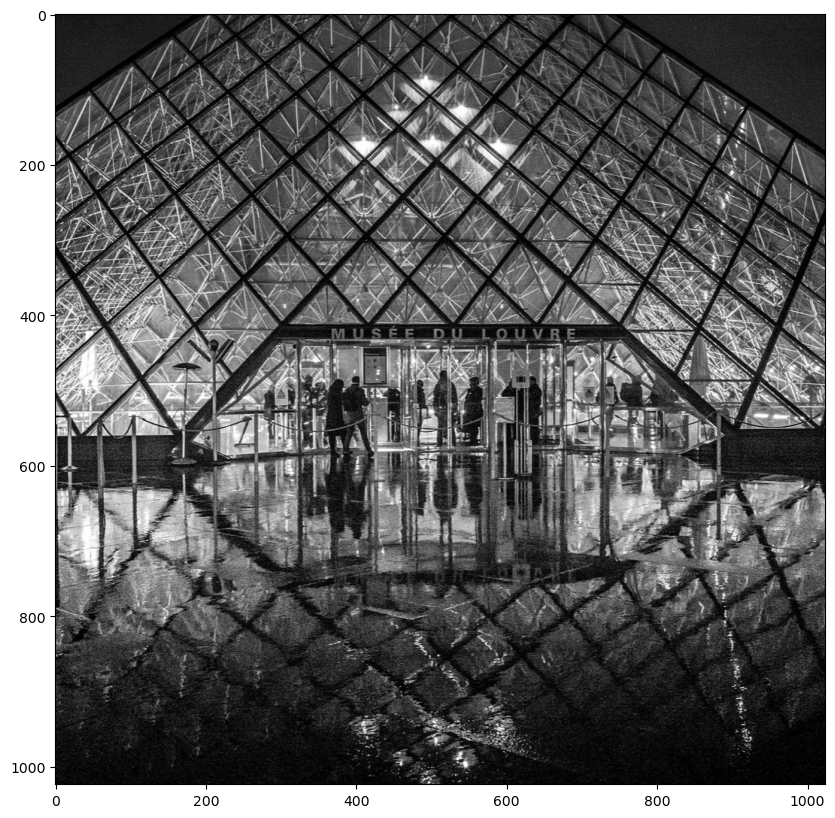

In [23]:
X = cv2.imread('louvre.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.show()

# Geometric Transformation

Input coordinates ${\bf X}$: $(i_0,j_0)$

Output coordinates ${\bf Y}$: $(i,j)$



$i_0 = a_{11}i + a_{12}j+a_{13}$

$j_0 = a_{21}i + a_{22}j+a_{23}$

where ${\bf m} = [i \ j \ 1]^{\sf T}$ y ${\bf m}_0 = [i_0 \ j_0 ]^{\sf T}$.

Thus,

${\bf m}_0 = {\bf A}{\bf m}$

In [24]:
# Interpolation using nearest integer towards zero
def geo_transformation(X,A,Yshape=None):

  if Yshape is None:
    (N,M) = X.shape
  else:
    (N,M) = Yshape
  Y = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:3] = [i,j,1]
      t = t+1

  m0  = np.dot(A,m.T)          # (i,j) -> (i0,j0) using equation explained above
  mpf = np.fix(m0).astype(int) # nearest integer towards zero

  # verification: does the pixel (i0,j0) belong to the image?
  i0 = mpf[0,:]
  j0 = mpf[1,:]
  kti = np.logical_and(i0>=0,i0<N)
  ktj = np.logical_and(j0>=0,j0<M)
  kt  = np.logical_and(kti,ktj)

  # output image
  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Y[i,j] = X[i0[t],j0[t]]
      t = t+1
  return Y

# Translation

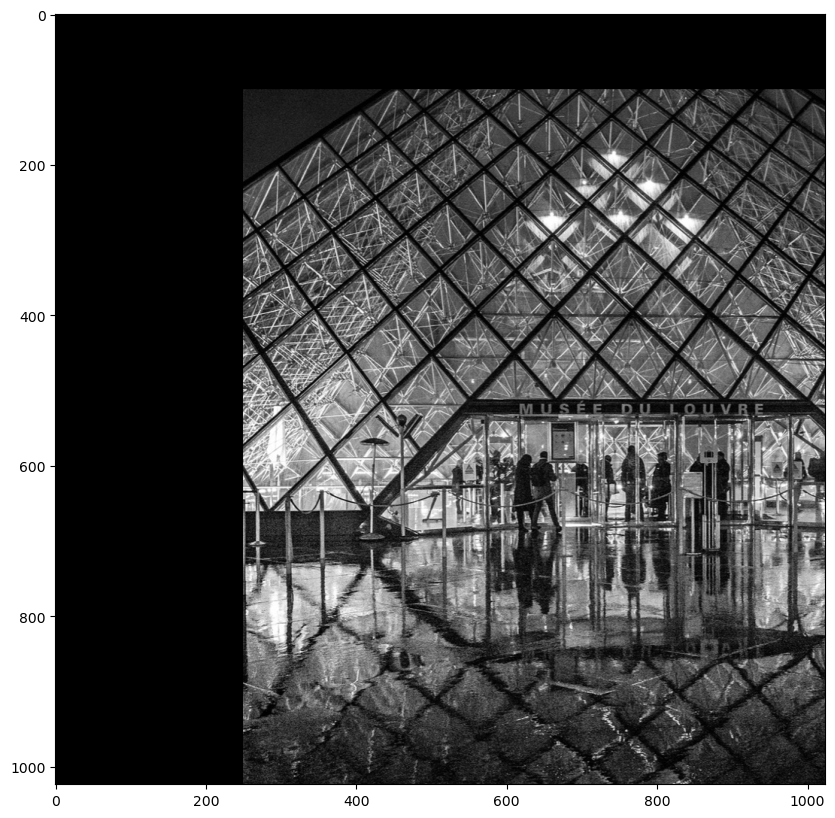

In [25]:
a11 = 1
a12 = 0
a13 = -100

a21 = 0
a22 = 1
a23 = -250

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()


# Rotation

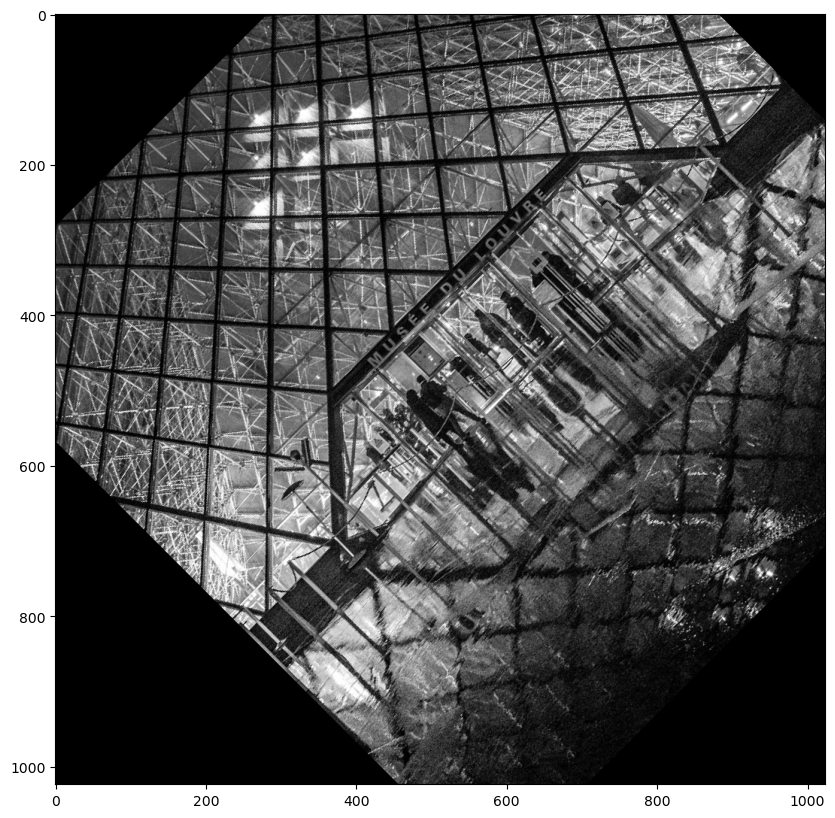

In [26]:
theta = 45.0 / 180.0 * np.pi
a11   = np.cos(theta)
a12   = np.sin(theta)
a13   = -200
a21   = -np.sin(theta)
a22   =  np.cos(theta)
a23   = 400
a1    = np.array([a11,a12,a13])
a2    = np.array([a21,a22,a23])
A     = np.vstack([a1,a2])
Y     = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

# Scaling

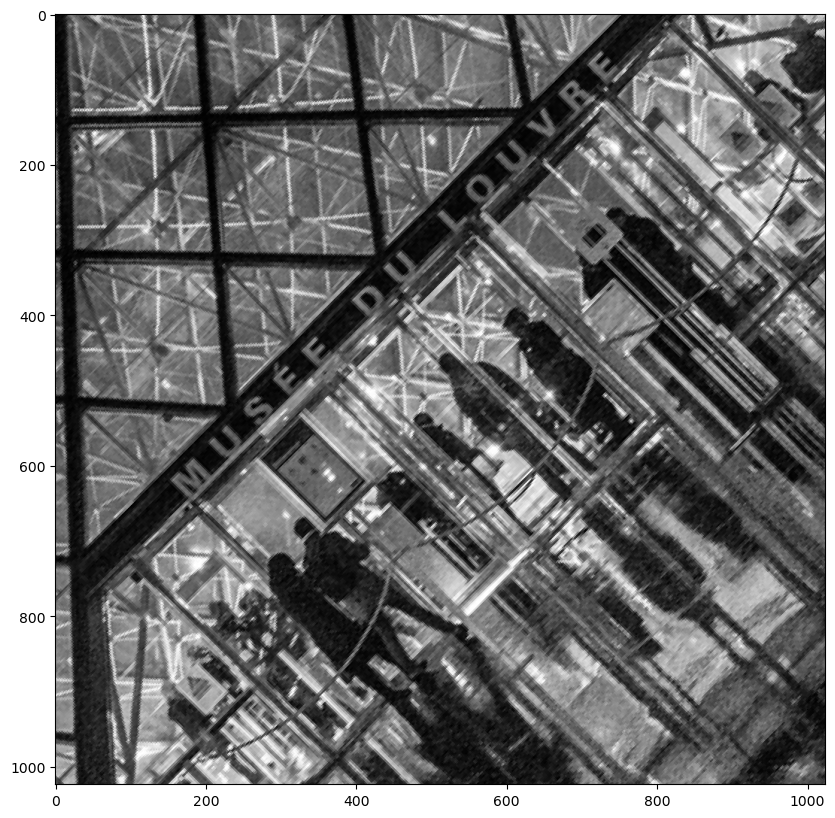

In [27]:
theta = 45.0 / 180.0 * np.pi

s     = 0.4


a11 = s*np.cos(theta)
a12 = s*np.sin(theta)
a13 = 200

a21 = -s*np.sin(theta)
a22 =  s*np.cos(theta)
a23 = 500

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()


# Example: Watch correction using Affine Transformation

[Affine transformation](https://mathworld.wolfram.com/AffineTransformation.html): *An affine transformation is any transformation that preserves collinearity (i.e., all points lying on a line initially still lie on a line after transformation) and ratios of distances (e.g., the midpoint of a line segment remains the midpoint after transformation).* `Wolfram Mathworld`

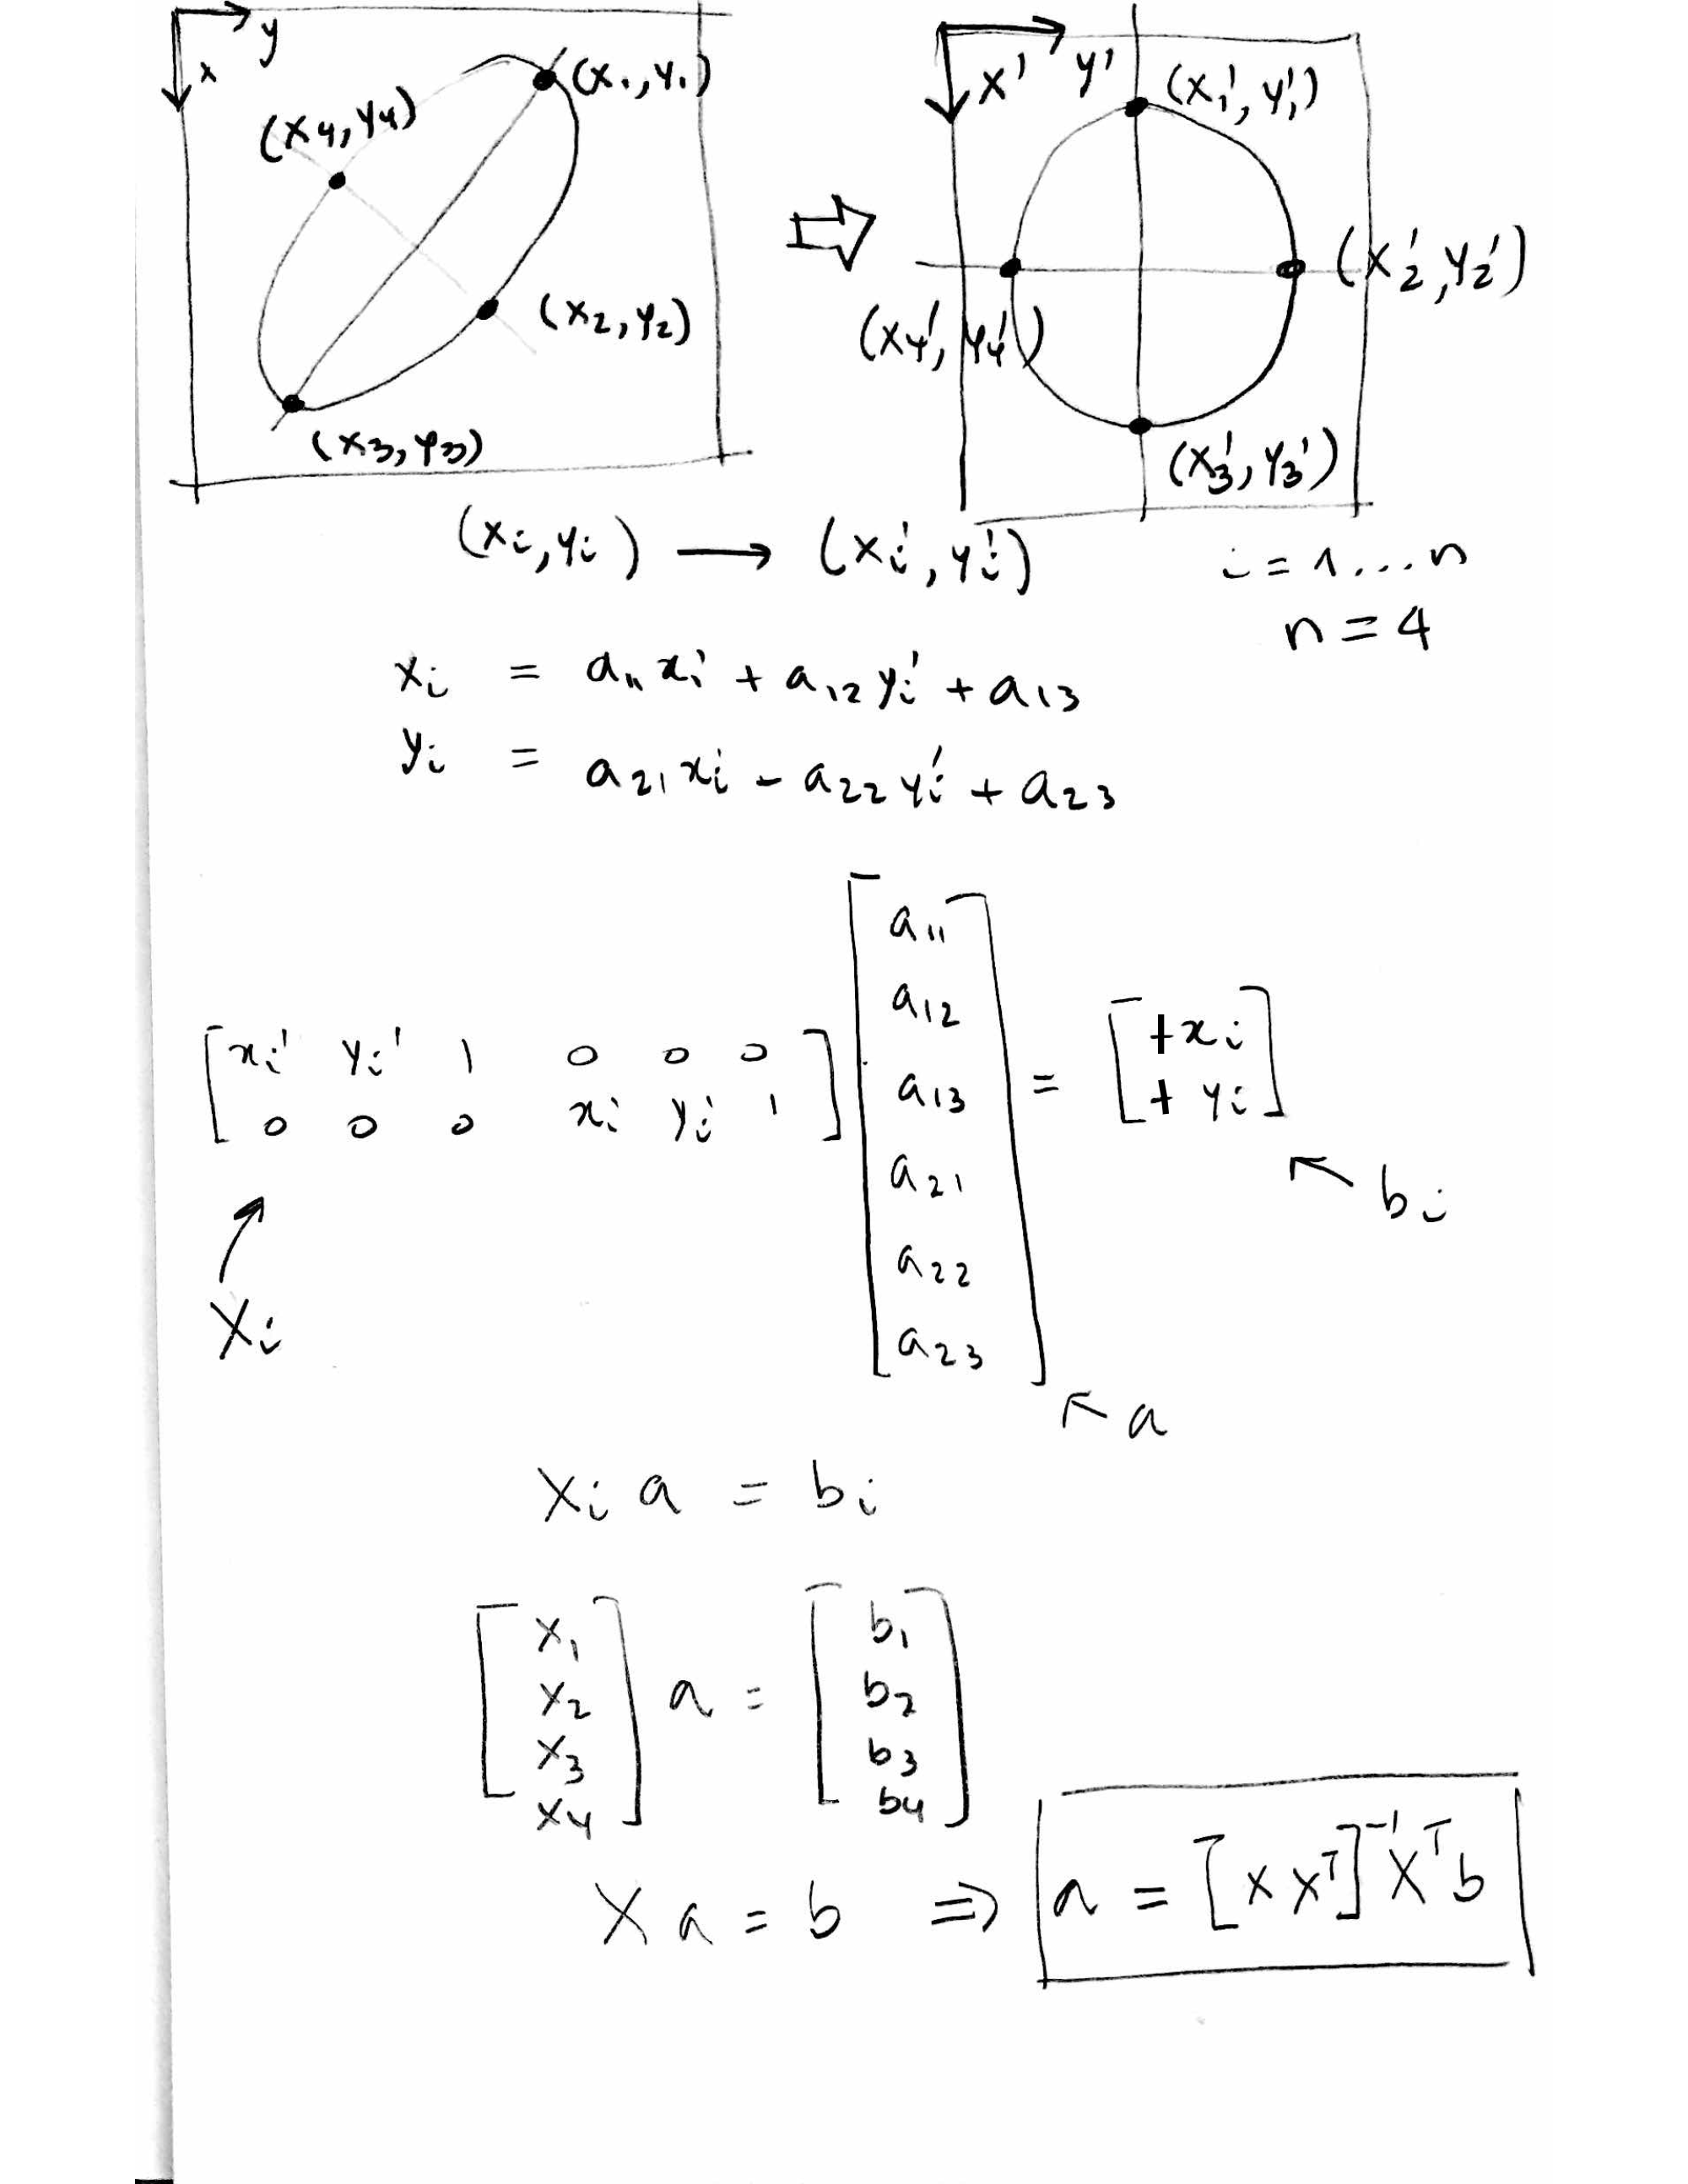

In [30]:
!curl -L -o clock.png https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   117  100   117    0     0    349      0 --:--:-- --:--:-- --:--:--   361

100    17  100    17    0     0     17      0  0:00:01 --:--:--  0:00:01    17

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 19  906k   19  176k    0     0  87348      0  0:00:10  0:00:02  0:00:08  187k
100  906k  100  906k    0     0   403k      0  0:00:02  0:00:02 --:--:--  806k


size =  (756, 1008)


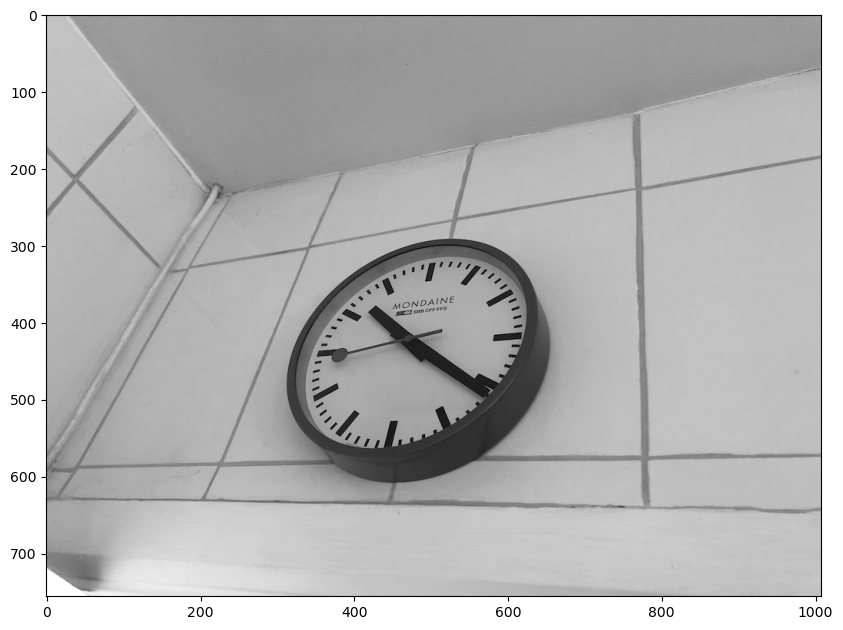

In [31]:
X = cv2.imread('clock.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.show()

WARNING: the geometric distortion in this example is the perspective, however, in this picture the distortion is similar to an affine transformation

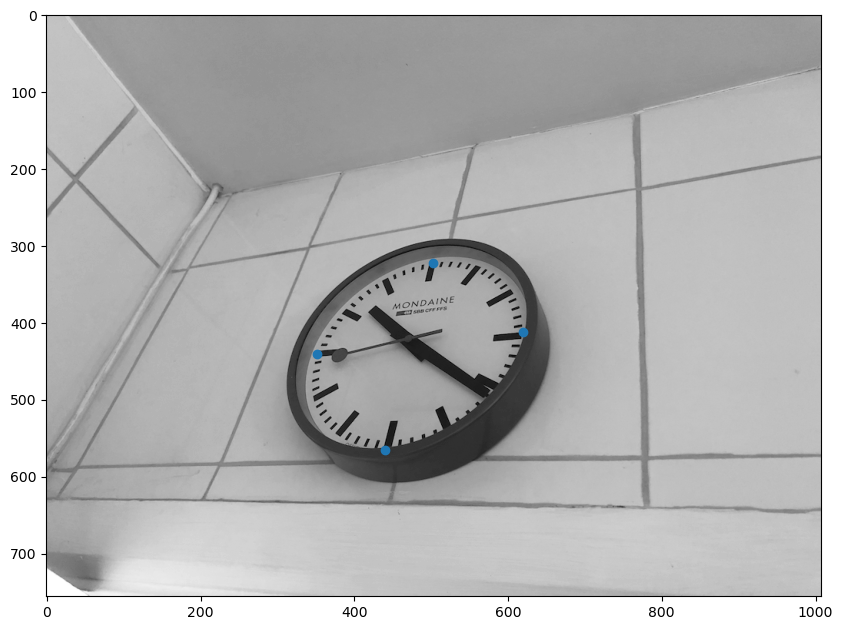

In [32]:
# Coordinates (i,j) (manually estimated for 12, 3, 6 y 9 o'clock):
b1 = np.array([322,502]).reshape(2,1)   # 12:00
b2 = np.array([412,620]).reshape(2,1)   # 03:00
b3 = np.array([565,440]).reshape(2,1)   # 06:00
b4 = np.array([440,352]).reshape(2,1)   # 09:00

i = [b1[0],b2[0],b3[0],b4[0]]
j = [b1[1],b2[1],b3[1],b4[1]]

plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.scatter(j,i)
plt.show()


In [33]:
# output, the four selected points are in the output image at coordinates (q+/-r,q+/-r)
r  = 200.0
q  = 400
m  = np.array([0,0,0])

c1 = np.array([q-r,q,1])
X1 = np.vstack([np.hstack([c1,m]),np.hstack([m,c1])])

c2 = np.array([q,q+r,1])
X2 = np.vstack([np.hstack([c2,m]),np.hstack([m,c2])])

c3 = np.array([q+r,q,1])
X3 = np.vstack([np.hstack([c3,m]),np.hstack([m,c3])])

c4 = np.array([q,q-r,1])
X4 = np.vstack([np.hstack([c4,m]),np.hstack([m,c4])])

A  = np.vstack([X1,X2,X3,X4])
b  = np.vstack([b1,b2,b3,b4])

t = np.linalg.lstsq(A, b, rcond=None)[0]  # inv(A'*A)*A'*b;


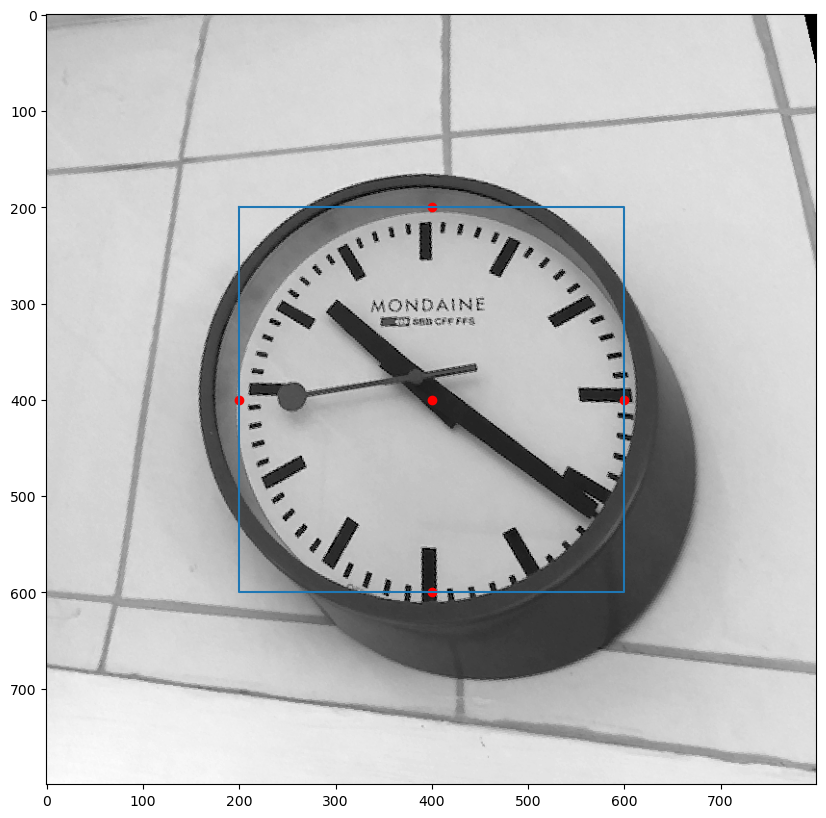

In [34]:
a1 = np.array([t[0],t[1],t[2]]).reshape(1,3)
a2 = np.array([t[3],t[4],t[5]]).reshape(1,3)

A  = np.vstack([a1,a2])

Y = geo_transformation(X,A,(2*q,2*q))
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')

i = np.array([q-r,q-r,q+r,q+r,q-r])
j = np.array([q-r,q+r,q+r,q-r,q-r])
plt.plot(j,i)

i = [c1[0],c2[0],c3[0],c4[0],q]
j = [c1[1],c2[1],c3[1],c4[1],q]
plt.scatter(j,i,c='red')

plt.show()